In [ ]:
import qsample as qs
import time
import stim
import numpy as np
import matplotlib.pyplot as plt
import time
import re

In [ ]:
ghz = qs.Circuit([ {"init": {0,1,2,3,4}},
                   {"H": {0}},
                   {"CNOT": {(0,1)}},
                   {"CNOT": {(1,2)}},
                   {"CNOT": {(2,3)}},
                   {"CNOT": {(3,4)}},
                   {"CNOT": {(0,4)}},
                   {"measure": {4}}   ])

# Define protocol for 1 round of repetition

def logErr(msmt_list):
    return msmt_list[-1] == 1 # If True transition to FAIL

functions = {'logErr': logErr}

ghz1 = qs.Protocol(check_functions=functions, fault_tolerant=False)

ghz1.add_node('ghz', circuit=ghz) # Add node with corresponding circuit
ghz1.add_edge('START', 'ghz', check='True') # Transition START -> first circuit node always True
ghz1.add_edge('ghz', 'FAIL', check='logErr(ghz)')

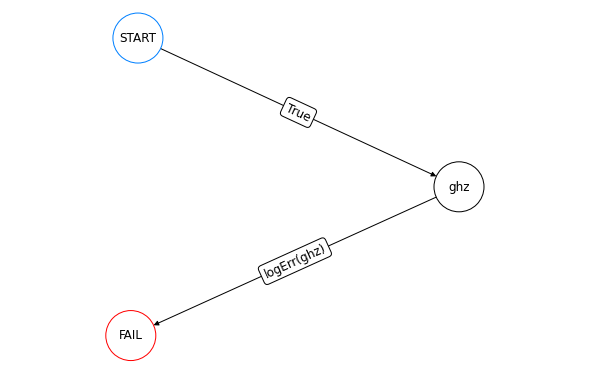

In [ ]:
ghz1.draw(figsize=(8,5))

In [ ]:
err_model = qs.noise.E1
q = [1e-5, 1e-3, 1e-1, 0.5]
err_params = {'q': q}

In [ ]:
begin = time.time()
ss_sam = qs.SubsetSampler(protocol=ghz1, simulator=qs.StabilizerSimulator,  p_max={'q': 0.1}, err_model=err_model, err_params=err_params, L=3)
ss_sam.run(1000)
end = time.time()
qsample_time = end-begin

p=('1.00e-01',):   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
qsample_times = []
stim_times = []

samples = [100, 300, 1000, 3000, 10000, 50000]

for s in samples:
    begin = time.time()
    ss_sam = qs.SubsetSampler(protocol=ghz1, simulator=qs.StabilizerSimulator,  p_max={'q': 0.01}, err_model=err_model, err_params=err_params, L=3)
    ss_sam.run(s)
    end = time.time()
    qsample_times.append(end-begin)

    begin = time.time()
    ss_sam = qs.SubsetSampler(protocol=ghz1, simulator=qs.StimSimulator,  p_max={'q': 0.01}, err_model=err_model, err_params=err_params, L=3)
    ss_sam.run(s)
    end = time.time()
    stim_times.append(end-begin)

p=('1.00e-02',):   0%|          | 0/100 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/100 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/300 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/300 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/1000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/1000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/3000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/3000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/10000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/10000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/50000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/50000 [00:00<?, ?it/s]

Average ratio of stim time/stabilizer time: 0.83


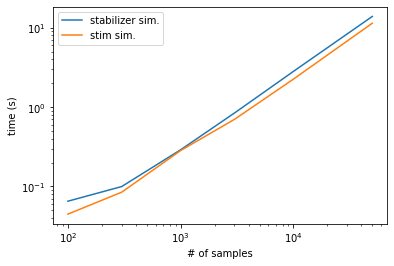

In [ ]:
plt.plot(samples, qsample_times, label = 'stabilizer sim.')
plt.plot(samples, stim_times, label = 'stim sim.')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time (s)')
plt.xlabel('# of samples')

print('Average ratio of stim time/stabilizer time: {:.2f}'.format(np.average(np.array(stim_times)/np.array(qsample_times))))